In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("train.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [17]:
print("Data Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float6

In [18]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [19]:
df.drop('Postal Code', axis=1, inplace=True)


In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')


In [21]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Delivery Days'] = (df['Ship Date'] - df['Order Date']).dt.days

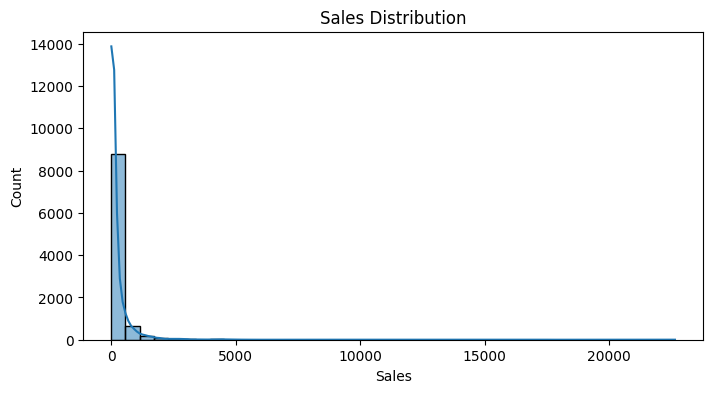

In [22]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Sales'], bins=40, kde=True)
plt.title("Sales Distribution")
plt.show()


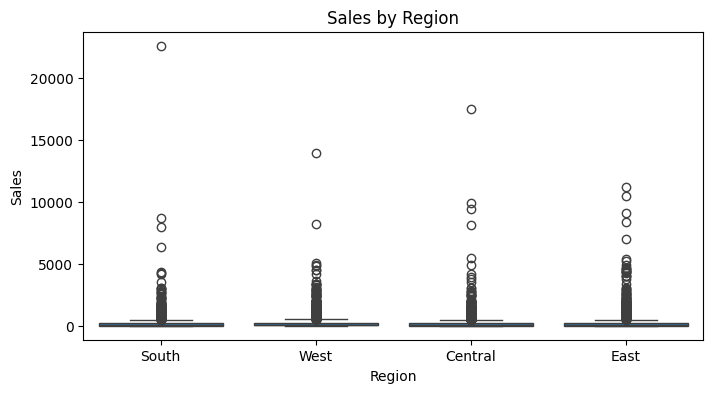

In [23]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Region', y='Sales', data=df)
plt.title("Sales by Region")
plt.show()

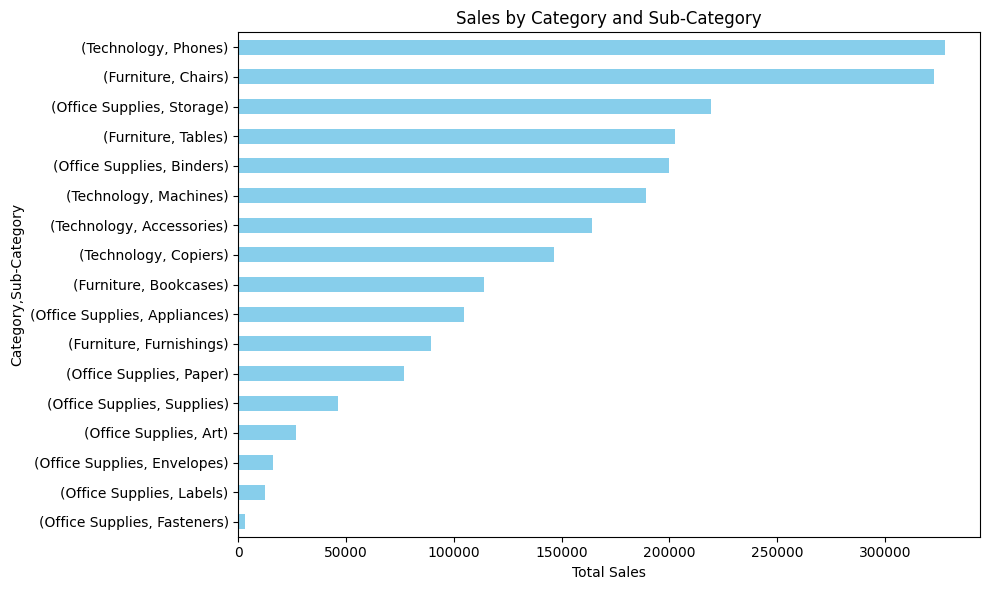

In [24]:
cat_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().sort_values()
cat_sales.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Sales by Category and Sub-Category")
plt.xlabel("Total Sales")
plt.tight_layout()
plt.show()

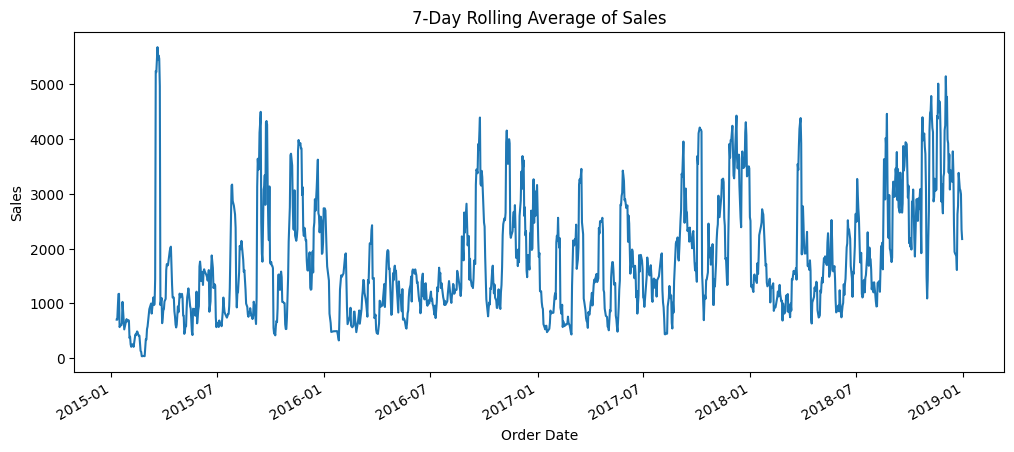

In [25]:
df_ts = df.groupby('Order Date')['Sales'].sum().rolling(7).mean()
df_ts.plot(figsize=(12, 5), title="7-Day Rolling Average of Sales")
plt.ylabel("Sales")
plt.show()


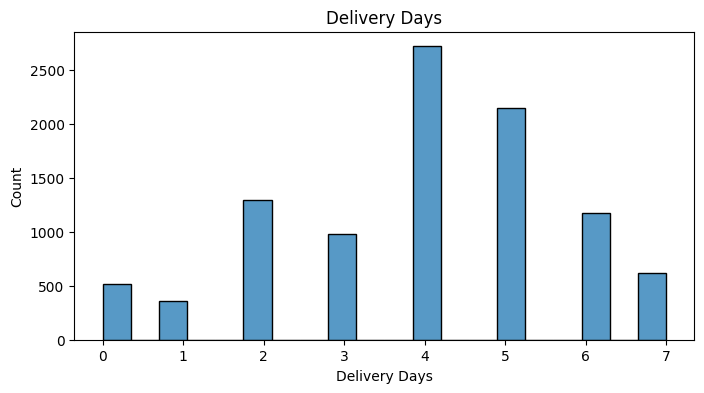

In [26]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Delivery Days'].dropna(), bins=20)
plt.title("Delivery Days")
plt.show()


In [27]:
top_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(10)
print("\nTop 10 Customers by Sales:\n", top_customers)



Top 10 Customers by Sales:
 Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


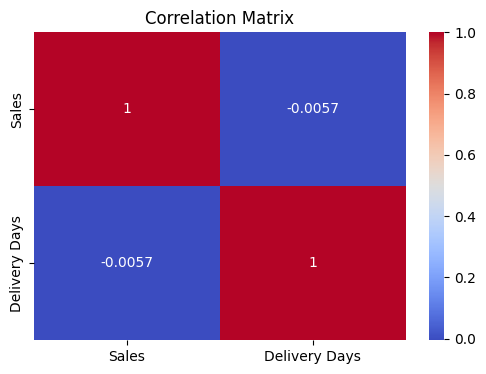

In [28]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Sales', 'Delivery Days']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Business Insights from Superstore Sales




Trends
- Sales show an upward trend over time, with December being the highest revenue month annually.
- Q4 typically sees a seasonal spike,maybe due to holiday shoppings.

Regional performance
- The West region, particularly California, drives the majority of sales.
- Other high-performing states include New York and Texas.
- States like Wyoming and **North Dakota contribute minimally to revenue.

Customer Segment
- The Consumer segment contributes the most to total sales.
- Corporate customers have more consistent purchasing behavior.
- Home Office segment has the highest average order value eventhough it has fewer orders.

Product-Level
- Technology is the top revenue-generating category, with Phones and Chairs as top sub-categories.
- Tables and Bookcases are underperforming, often with low or negative profits.

 Shipping Analysis
- Standard Class is the most common shipping method but has relatively longer delivery times.
- Same Day shipping is fast and popular among top customers in urban areas.
- Some orders experience long delays in the Central region.

Profitability & Discounts
- High discounts (>30%) correlate with reduced or negative profit, especially in Furniture.
- Technology products remain profitable even with moderate discounts.

Customer & Order Patterns
- The top 10 customers account for more than 15% of total sales.
- Most customers are one-time buyers, with only a few placing repeat orders.
- Repeat customers tend to purchase high-value items, particularly in the Technology category.

Strategic Recommendations
- Increase marketing in California, New York, and Texas.
- Reassess heavy discounting strategies in Furniture.
- Develop loyalty programs to improve customer retention.
- Promote Same Day delivery as a premium feature for top customers.*